In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv("/home/inventor/Datasets/California House Price/Cal_house/housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# FIll missing values 
df.fillna(df["total_bedrooms"].mean(), inplace=True)

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
# Duplicated values 
df.duplicated().sum()

np.int64(0)

In [10]:
num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"]]
cat_cols = [col for col in df.columns if df[col].dtype not in ["float64", "int64"]]

In [11]:
# Correlation Matrix 
corr_matrx = df[num_cols].corr()

corr_matrx["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: >

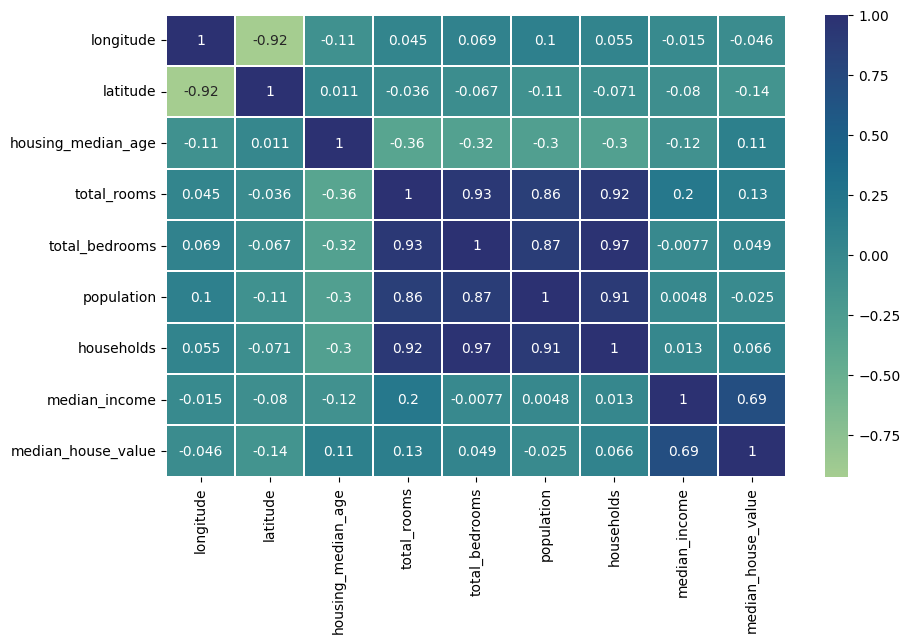

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrx, annot=True, cmap=sns.color_palette("crest", as_cmap=True), linewidths=0.2)

In [13]:
# Change the datatype
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
df["housing_median_age"] = df["housing_median_age"].astype("int64")
df["total_rooms"] = df["total_rooms"].astype("int64")
df["total_bedrooms"] = df["total_bedrooms"].astype("int64")
df["population"] = df["population"].astype("int64")
df["households"] = df["households"].astype("int64")
df["median_house_value"] = df["median_house_value"].astype("int64")

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [16]:
# Normalize 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [17]:
# Encode Categories columns

from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first")

encoder = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoder, columns=one_hot.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df, encoded_df], axis=1)

In [18]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY,0.0,0.0,1.0,0.0


In [19]:
encoded_df = encoded_df.drop("ocean_proximity", axis=1)

In [20]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,1.0,0.0


In [31]:
encoded_df["ocean_proximity_INLAND"] = encoded_df["ocean_proximity_INLAND"].astype("int64")
encoded_df["ocean_proximity_ISLAND"] = encoded_df["ocean_proximity_ISLAND"].astype("int64")
encoded_df["ocean_proximity_NEAR BAY"] = encoded_df["ocean_proximity_NEAR BAY"].astype("int64")
encoded_df["ocean_proximity_NEAR OCEAN"] = encoded_df["ocean_proximity_NEAR OCEAN"].astype("int64")

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("median_house_value", axis=1), encoded_df["median_house_value"], test_size=0.2, random_state=42)

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_sk = lr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score

r2_score_sk = r2_score(y_test, y_pred_sk)
r2_score_sk

0.6257361394054031

In [153]:
class Batch_Gradient_Descent():

    def __init__(self, learning_rate, epochs):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0,1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01
        self.intercept_ = 0

        for i in range(self.epochs):
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            intercept_slope = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ + (self.lr * intercept_slope)

            coef_slope = -2 * np.mean((y_train - y_hat)[:, np.newaxis] * X_train)
            self.coef_ = self.coef_ + (self.lr * coef_slope)
            
        
        print(f"Coef_: {self.coef_}, Intercept_: {self.intercept_}")
            
        
    def predict(self, X_test):
        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred


In [174]:
bgd = Batch_Gradient_Descent(learning_rate=0.00001, epochs=1000)

In [175]:
bgd.fit(X_train, y_train)

Coef_: [ 0.00371372  0.00336815  0.00285404  0.00678128  0.00484733  0.00676687
  0.0095997   0.00029236  0.00062478  0.00994492 -0.00481493 -0.0103865
 -0.00707868], Intercept_: 5.303937056658813e-05


In [176]:
y_pred = bgd.predict(X_test)

In [177]:
def r2_score_custom(y_true, y_pred):

    mean_value = np.mean(y_true)

    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)

    r2_score = 1 - (SSE / TSS)
    return r2_score

In [178]:
r2_score_c = r2_score_custom(y_test, y_pred)
r2_score_c

np.float64(-0.004129401471554495)

In [179]:
r2_score(y_test, y_pred)

-0.004129401471554495

In [148]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(learning_rate="constant", eta0=0.01, max_iter=100)

sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)

In [149]:
r2_score(y_test, y_pred_sgd)

0.5615464955314237

In [150]:
sgd.intercept_, sgd.coef_

(array([0.16083255]),
 array([-0.50742452, -0.40633079,  0.07395273, -0.01695756,  0.331011  ,
        -0.4410473 ,  0.06581077,  0.81018899, -0.37537855,  0.48756224,
        -0.03142341,  0.05536178]))